In [86]:
import pandas as pd
import matplotlib as plt


from sklearn.preprocessing import OneHotEncoder

df_bike = pd.read_csv("Bike.csv")
df_bike.rename(columns={'cnt': 'cnt_rental_bike'}, inplace= True)

In [87]:
#task1 
import pandas as pd 
import matplotlib as plt

from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("Bike.csv")

print("first rows:")
print(df.head())

print("\nshape (rows,columns):")
print(df.shape)

print("Data types:")
print(df.dtypes)

first rows:
   instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]

shape (rows,columns):
(17379, 17)
Data types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [88]:
#task2 
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [89]:
#task3 
df.duplicated().sum()

np.int64(0)

In [90]:
#task4 
df_bike['datetime'] = pd.to_datetime(df_bike['dteday'] + " " + df_bike['hr'].astype(str) + ":00:00")
print(df_bike['datetime'].dtypes)


datetime64[ns]


In [91]:
#task5
df_bike.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_rental_bike,datetime
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,NaN


In [92]:
#task6
print("Total:", df_bike['cnt_rental_bike'].sum())
print("Mean:", df_bike['cnt_rental_bike'].mean())
print("Min:", df_bike['cnt_rental_bike'].min())
print("Max:", df_bike['cnt_rental_bike'].max())



Total: 3292679
Mean: 189.46308763450142
Min: 1
Max: 977


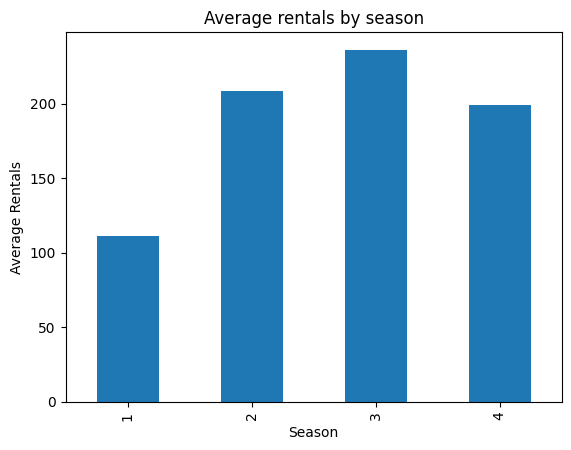

In [93]:
#task7 
import matplotlib.pyplot as plt 

df_bike.groupby('season')['cnt_rental_bike'].mean().plot(kind='bar')
plt.title("Average rentals by season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.show()



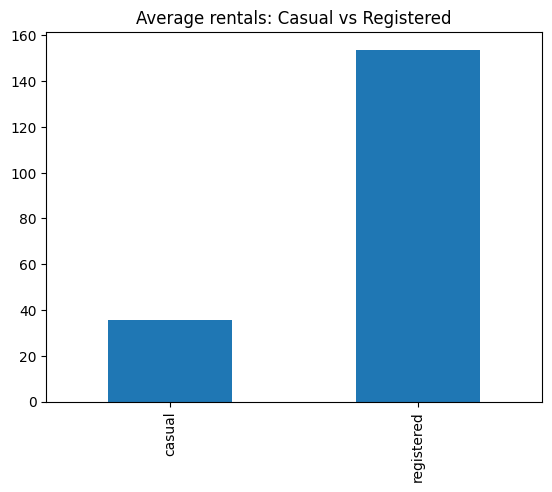

In [94]:
#task8
df_bike[['casual', 'registered']].mean().plot(kind='bar')
plt.title("Average rentals: Casual vs Registered")
plt.show()


In [95]:
#task9
weather_map = {1: 'clear', 2: 'cloudy', 3: 'light rain', 4: 'heavy rain'}
df_bike['weathersit'] = df_bike['weathersit'].map(weather_map)
print(df_bike['weathersit'].unique())


['clear' 'cloudy' 'light rain' 'heavy rain']


In [96]:
#task10
print(df_bike['weathersit'].dtypes)


object


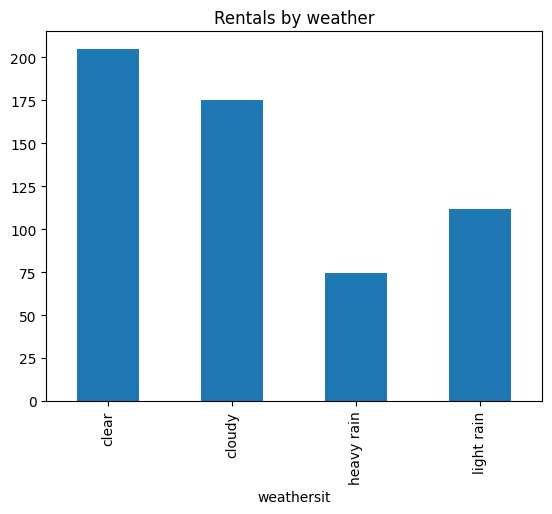

In [97]:
#task11
df_bike.groupby('weathersit')['cnt_rental_bike'].mean().plot(kind='bar')
plt.title("Rentals by weather")
plt.show()


In [98]:
#task12
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded = encoder.fit_transform(df_bike[['weathersit']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['weathersit']))

print(encoded_df.head())



   weathersit_clear  ...  weathersit_light rain
0               1.0  ...                    0.0
1               1.0  ...                    0.0
2               1.0  ...                    0.0
3               1.0  ...                    0.0
4               1.0  ...                    0.0

[5 rows x 4 columns]


#task13
so one-hot encoding makes extra columns for each category
it is nice for stuff like weather cause there is no order  

but the problem is if you have many categories, you get a lot of columns 
and sometimes it’s too much. Also some columns can be like copies

if the data has order like small < medium < big then one-hot is not good
better use ordinal cause it keeps the order  

In [99]:
#task14
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(df_bike[['weathersit']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['weathersit']))

print(encoded_df.head())



   weathersit_cloudy  weathersit_heavy rain  weathersit_light rain
0                0.0                    0.0                    0.0
1                0.0                    0.0                    0.0
2                0.0                    0.0                    0.0
3                0.0                    0.0                    0.0
4                0.0                    0.0                    0.0


In [100]:
#task15
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
df_bike['season_encoded'] = ordinal.fit_transform(df_bike[['season']])

print(df_bike[['season', 'season_encoded']].head())


   season  season_encoded
0       1             0.0
1       1             0.0
2       1             0.0
3       1             0.0
4       1             0.0


In [101]:
#task16
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
df_bike['temp_norm'] = scaler.fit_transform(df_bike[['temp']])

print(df_bike[['temp', 'temp_norm']].head())



   temp  temp_norm
0  0.24   0.224490
1  0.22   0.204082
2  0.22   0.204082
3  0.24   0.224490
4  0.24   0.224490


In [102]:
#task17
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
df_bike['temp_std'] = scaler.fit_transform(df_bike[['temp']])

print(df_bike[['temp', 'temp_std']].head())



   temp  temp_std
0  0.24 -1.334648
1  0.22 -1.438516
2  0.22 -1.438516
3  0.24 -1.334648
4  0.24 -1.334648


#Task 18
I think normalization is better for columns like temp,atemp,hum and windspeed  
Because they already have values in some fixed range so putting them to 0–1 is ok

For casual,registered and cnt_rental_bike I would use standardization
These numbers are bigger and not limited so it’s better to make them with mean 0 and std 1
This way models can understand them easier


3.Conceptual questions 
1.B
2.Nominal = categories without order like colors orange, blue
Ordinal = categories with order like small , medium , large
3.True
4.For each row the sum is 1
5.To avoid multicollinearity
6.Better ordinal because rank has order 1  ,2,  3
7.If we have a feature like country with 200+ categories
8.B
9.False
10.Min = 10 Max = 53
10 => 0
22 =>(22-10)/(53-10) = 12/43 = 0.28
27 => 17/43 = 0.40
53 =>1
11.z = (75 - 50)/10 = 25/10 = 2.5
12.to make all features on same level
